In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

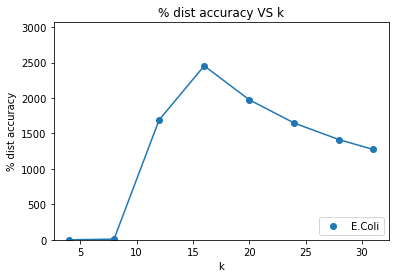

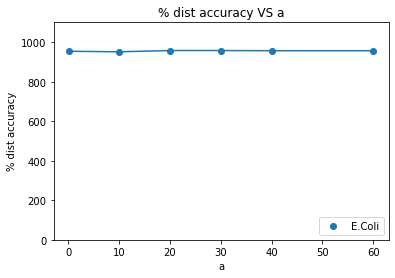

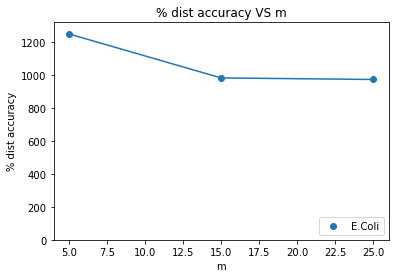

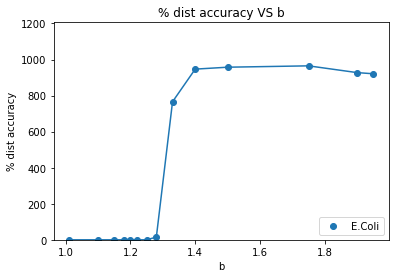

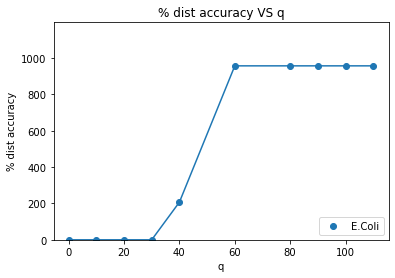

In [15]:
result_df = pd.read_excel('Parameter_Testing_Ecoli.xlsx', sheet_name='k')
actual_dist = result_df['actual dist'].values[0]
for param in ['k', 'a', 'm', 'b', 'q']:
    result_df = pd.read_excel('Parameter_Testing_Ecoli.xlsx', sheet_name=param)
    X = result_df.iloc[:,0].values
    y = result_df['dist'].values
    y = 100 - (actual_dist - y) / actual_dist * 100
    first_X = X
    first_y = y
    plt.scatter(first_X, first_y, label="E.Coli")
    plt.plot(first_X, first_y)
    plt.legend(loc='lower right')
    plt.xlabel(param)
    plt.ylabel("% dist accuracy")
    plt.title("% dist accuracy VS "+param)
    # plt.ylim(max(np.min(y) - 0.2 * (np.max(y) - max(np.min(y) - 5, 0)), -5), np.max(y) + 0.25 * (np.max(y) - max(np.min(y) - 5, 0)))
    plt.ylim([0, np.max(y) + 0.25 * (np.max(y) - max(np.min(y) - 5, 0))])
    if param == 'a':
        plt.ylim([0, 1100])
    
    # plt.ylim([0, 100])
    plt.savefig("hyperparameter_tunning_plots/Ecoli_"+param)
    plt.show()

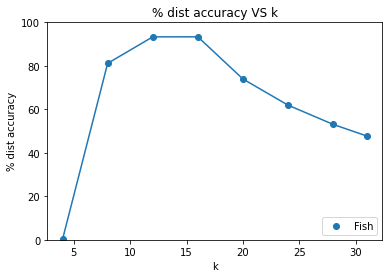

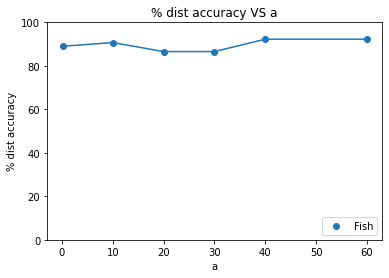

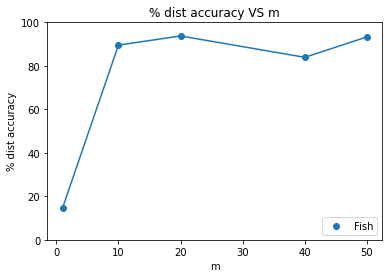

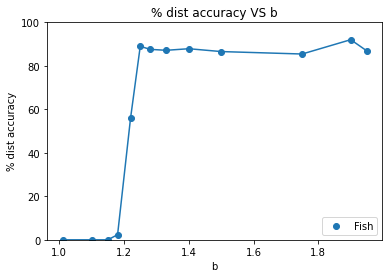

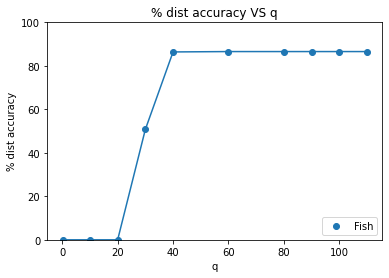

In [16]:
for param in ['k', 'a', 'm', 'b', 'q']:
    # Fish
    result_df = pd.read_excel('Parameter_Testing.xlsx', sheet_name=param)
    X = result_df.iloc[:,0].values
    for i in result_df.columns:
        if "%" in i:
            y = result_df[i].values
    size = len(X) // 2
    first_X = X[:size]
    first_y = y[:size]
    second_X = X[size:]
    second_y = y[size:]
    sorted_index = np.argsort(first_X)
    first_X = first_X[sorted_index]
    first_y = first_y[sorted_index]
    sorted_index = np.argsort(second_X)
    second_X = second_X[sorted_index]
    second_y = second_y[sorted_index]
    if param == 'q':
        first_X = X
        first_y = y
    plt.scatter(first_X, first_y, label="Fish")
    plt.plot(first_X, first_y)
    # plt.scatter(second_X, second_y, label='E. coli')
    # plt.plot(second_X, second_y)
    plt.legend(loc='lower right')
    plt.xlabel(param)
    plt.ylabel("% dist accuracy")
    plt.title("% dist accuracy VS "+param)
    y = first_y
    # plt.ylim(max(np.min(y) - 0.1 * (np.max(y) - max(np.min(y) - 5, 0)), -5), np.max(y) + 0.25 * (np.max(y) - max(np.min(y) - 5, 0)))
    plt.ylim([0, 100])
    plt.savefig("hyperparameter_tunning_plots/Fish_"+param)
    plt.show()